# 排序 

### 1. 基本排序算法
- 冒泡排序
- 选择排序
- 插入排序

In [11]:
#冒泡排序
def bubbleSort(alist):
    for i in range(len(alist)-1, 0, -1):
        for j in range(i):
            if alist[j] > alist[j+1]:
                alist[j], alist[j+1] = alist[j+1], alist[j]
                

#选择排序
def selectionSort(alist):
    for i in range(len(alist)-1,0,-1):
        positionOfMax = 0
        for j in range(1,i+1):
            if alist[j] > alist[positionOfMax]:
                positionOfMax = j
        alist[positionOfMax], alist[i] =  alist[i], alist[positionOfMax]


#插入排序
def insertSort(alist):
    for i in range(1, len(alist)):
        j = i
        while j >= 1 and alist[j-1] > alist[j]:
            alist[j-1], alist[j] = alist[j], alist[j-1]
            j -= 1


### 使用 `timeit` 比较三种基本排序算法的执行效率

In [40]:
import time
import random

random.seed(1)

a = [random.randint(1, 1000) for i in range(1000)]

start = time.time()

bubbleSort(a)

print(time.time()-start)

0.1824970245361328


In [41]:
start = time.time()

bubbleSort(a)

print(time.time()-start)

0.09605813026428223


In [42]:
start = time.time()

bubbleSort(a)

print(time.time()-start)

0.09333086013793945


### 使用 `matplotlib` 绘制排序时间复杂度

In [ ]:
# 导入 pyplot

%matplotlib inline 

import matplotlib.pyplot as plt

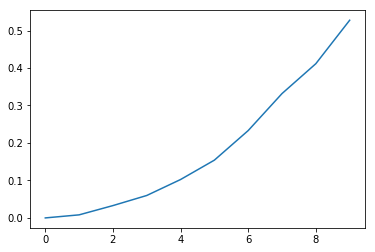

In [61]:
def bubbleSortTime(a):
    
    start = time.time()
    bubbleSort(a)
    return time.time()-start

l = [[random.randint(1, 1000) for i in range(200*j)] for j in range(10)]

y = [bubbleSortTime(a) for a in l]

plt.plot(y)

### 练习：绘制选择排序与插入排序的时间复杂度

### 2. 希尔排序

In [73]:
def shellSort(alist):

    gap = len(alist)//2

    while gap > 0:
        for startposition in range(gap):
            gapInsertionSort(alist,startposition,gap)

        print("After increments of size", gap, "The list is",alist)

        gap //=  2

def gapInsertionSort(alist,start,gap):

    for i in range(start+gap,len(alist),gap):

        currentvalue = alist[i]
        position = i

        while position >= gap and alist[position-gap] > currentvalue:
            alist[position] = alist[position-gap]
            position -= gap

        alist[position] = currentvalue

alist = [54,26,93,17,77,31,44,55,20]
shellSort(alist)
print(alist)


After increments of size 4 The list is [20, 26, 44, 17, 54, 31, 93, 55, 77]
After increments of size 2 The list is [20, 17, 44, 26, 54, 31, 77, 55, 93]
After increments of size 1 The list is [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


### 练习：修改函数 `shellSort`, 使其步长序列为 $2^k−1$, 比较和其修改前的时间复杂度。

```
from math import log2, floor
```

### 3.归并排序

In [77]:
def mergeSort(alist):

    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i, j, k = 0, 0, 0

        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] <= righthalf[j]:
                alist[k] = lefthalf[i]
                i += 1
            else:
                alist[k] = righthalf[j]
                j += 1
            k += 1

        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i += 1
            k += 1

        while j < len(righthalf):
            alist[k] = righthalf[j]
            j += 1
            k += 1


alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


### 4. 快速排序

In [74]:
def partition(alist, first, last):

    pivot = alist[first]
    leftmark = first + 1
    rightmark = last

    done = False
    while not done:
        while leftmark <= rightmark and alist[leftmark] <= pivot:
            leftmark += 1

        while leftmark <= rightmark and alist[rightmark] >= pivot:
            rightmark -= 1

        if leftmark < rightmark:
            alist[leftmark], alist[rightmark] = alist[rightmark], alist[leftmark]
        else:
            done = True

    alist[rightmark], alist[first] = alist[first], alist[rightmark]

    return rightmark


def quickSortHelper(alist, first, last):

    if first < last:
        splitpoint = partition(alist, first, last)
        quickSortHelper(alist, first, splitpoint-1)
        quickSortHelper(alist, splitpoint+1, last)

def quickSort(alist):
    quickSortHelper(alist, 0, len(alist)-1)


alist = [54,26,93,17,77,31,44,55,20]
quickSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


### 练习：比较快速排序算法、归并排序算法与希尔排序算法的时间复杂度